# 変分オートエンコーダ(VAE)

ニューラルネットワークと生成モデルを組み合わせることで、より複雑な表現が可能になっている。

ここでは、一例としてVAEについて導出を行う。

## 7.1 VAEとデコーダ

本書では、始めに一つの正規分布でモデルを作成した。次に複数の正規分布を使用した混合ガウスモデル（GMM)についてモデルを作成した。

VAEで目指すのは、学習データに合わせて柔軟に形が決まる確率分布である。変分オートエンコーダーはニューラルネットワークを使用することで、より複雑な表現が可能となる。

### 7.1.1 一つの正規分布

正規分布のパラメータを$\theta = \{ \mu,\Sigma\}$で表す。データ$x$の分布を一つの正規分布でモデル化する場合、確率分布は

$$ p_\theta(x) = \mathcal{N}(x;\theta) $$

と表される。パラメータ$\theta$は$N$個の観測データ$\mathcal{D} = \{x^{(1)},x^{(2)},\cdots,x^{(N)}\}$から、対数尤度が最大になるパラメータを求める。対数尤度は次の式で表される。

$$\log p_\theta(\mathcal{D}) = \log \left( p_\theta(x^{(1)})p_\theta(x^{(2)})\cdots p_\theta(x^{(N)})\right)$$

対数尤度を最大にする$\theta$は$\frac{\partial}{\partial\theta}\log p_\theta(\mathcal{D})=0$を解くことで求められる。

### 7.1.2 混合ガウスモデル（GMM)

複数の正規分布から構成されたモデルで、次の二つの作業でデータを生成する。

1. $K$個の正規分布の中から、カテゴリカル分布に従って一つを選ぶ
2. 選んだ正規分布からデータを生成する

GMMでは解析的にパラメータを推定することができない。そこで、ELBOを目的関数とする。

$$\log p_\theta(\mathcal{D})\geq \sum^N_{n=1}\sum_{z^{n}}q^{(n)}(z^{(n)})\log\frac{p_\theta(x^{(n)},z^{(n)})}{q^{(n)}(z^{(n)})}$$

EMアルゴリズムでは、ELBOを目的関数として以下の作業を繰り返す。

1. **Eステップ** : $\{q^{(1)},q^{(2)},\cdots,q^{(N)}\}$の更新

各$n$に対して$q^{(n)}(z)=p_\theta(z|\boldsymbol{x}^{(n)})$とする

2. **Mステップ** : $\theta$の更新

ELBOが最大になる$\theta$を解析的に求める

### 7.1.3 VAE

ここまで、今までの内容について復習した。ここから、VAEについて考える。

VAEはGMMと同様に潜在変数を持つモデルである。

1. 潜在変数$z$を固定の正規分布から生成する
2. ニューラルネットワークによって潜在変数$z$から観測変数$x$へと変換する

VAEではニューラルネットワークを使って、潜在変数$z$から観測変数$x$へと変換を行っている。

潜在変数$z$は$H$次元のベクトルとし、次のように表される

$$ z = \begin{pmatrix} z_1 \\ z_2 \\ \vdots \\ z_H\end{pmatrix}$$

VAEでは、潜在変数は「固定の正規分布」($\mu = 0, \Sigma = \boldsymbol{I}$)から生成されると仮定すると、$z$は$\mathcal{N}(z;\boldsymbol{0},\boldsymbol{I})$に従う。数式で表すと

$$p(z) = \mathcal{N}(z;\boldsymbol{0},\boldsymbol{I})$$

潜在変数の$z$は$\mathcal{N}(z;\boldsymbol{0}, \boldsymbol{I})$という単純な確率分布から生成されるが、ニューラルネットワークによって複雑な変換を実現することでができる。

潜在変数$z$から観測変数$x$への変換を**デコーダー**（**Dercoder**）と呼ばれる。

GMMでは、離散的な値$z$をサンプリングする。GMMは潜在変数が一つの離散値に限定される（一つの正規分布から生成するため）。
一方VAEでは正規分布から連続な値を持つベクトル$z$をサンプリングするため、多様かつ広範囲な表現が可能である。

私たちの目標は、観測変数$x$の確率分布$p(x)$を得ることである。

ニューラルネットワークの出力を平均ベクトルとする正規分布を考える。数式で表すと

$$ \hat{x} = \rm{NeuralNet}(z;\theta) $$
と表される。$z$は入力、$\hat{x}$は出力、$\theta$はニューラルネットワークのパラメータを表す。出力される$z$はニューラルネットワークで求めた$\hat{x}$を用いて

$$p_\theta(x|z) = \mathcal{N}(x;\hat{x},\boldsymbol{I})$$

と表される。$x$は$\hat{x}$を平均ベクトルとする正規分布に従うと考える。ここでは、簡単のため共分散行列を単位行列$I$と仮定する。


**ここで、一度まとめ**

潜在変数$z$は要素数$K$個のベクトルであり、固定の正規分布に従い生成される。

$$p(\boldsymbol{z}) = \mathcal{N}(\boldsymbol{z};\boldsymbol{0},\boldsymbol{I})$$

次にニューラルネットワークでは、$z$を入力として$\hat{x}$を生成する。

$$\hat{x} = \rm{Neuralnet}(\boldsymbol{z};\boldsymbol{\theta})$$

最後に、VAEの出力$x$は

$$p(\boldsymbol{x}|\boldsymbol{z}) = \mathcal{N}(\boldsymbol{x};\hat{\boldsymbol{x}},\boldsymbol{I})$$

と表される。$x$は$\hat{x}$を平均ベクトルとする正規分布に従い（$\boldsymbol{\mu} = \boldsymbol{\hat{x}}$の正規分布に従う）サンプリングされる。

### 7.1.4 EMアルゴリズムの問題点

Eステップでは、$q^{(n)}(\boldsymbol{z}) = p_\theta(\boldsymbol{z}|\boldsymbol{x}^{(n)})$という計算を行う。

潜在変数を持つモデルの対数尤度は、潜在変数$z$を生成する任意の確率分布$q(z)$を使用して

$$\log p_\theta(x) = \sum q(z) \log\frac{p_\theta(x,z)}{q(z)}+D_{KL}(q(z)||p_\theta(z|x))$$

と表される。第二項を最小化するステップがEステップである。これは、KLダイバージェンスを0に近づけるための操作である。

VAEの場合、

$$p_\theta(\boldsymbol{z}|\boldsymbol{x}^{(n)}) = \frac{p_\theta(\boldsymbol{x}^{(n)} | \boldsymbol{z})}{p_\theta(\boldsymbol{x}^{(n)})}\\
 = \frac{p_\theta(\boldsymbol{x}^{(n)} | \boldsymbol{z})}{\int p_\theta(\boldsymbol{x}^{(n)} | \boldsymbol{z})dz}$$
 
の計算を行う必要がある。GMMの場合はカテゴリカル分布であったため積分を行うことができた。一方VAEでは潜在変数は次元数$K$の多次元ベクトルであり、すべてのとり得る値について積分を行うことは不可能である。

## 7.2 VAEとエンコーダー

EMアルゴリズムを改良することで、VAEの学習が行えるようになる。

### 7.2.1 EMアルゴリズムからVAEへ

対数尤度から、任意の確率分布$q(\boldsymbol{z})$を用いて次のように式を展開した。

$$\log p_\theta(x) = \log p_\theta(x) \int q(z) dz \\
 = \left(\int q(z)dz\right)\log{p_\theta(x)}dz\\
 = \int q(z) \log\frac{p_\theta(x,z)}{p_\theta(z|x)}dz\\
 = \int q(z) \log\frac{p_\theta(x,z)}{q(z)}dz+\int q(z)\log\frac{q(z)}{p_\theta(z|x)}dz$$

対数尤度は、二つの項の和として表される。（連続変数であるため、$\sum$から$\int$に変化していることに注意）

KLダイバージェンスの最小値は$0$であるため、次の式が成立する。

$$\log p_\theta(x) = \int q(z) \log\frac{p_\theta(x,z)}{q(z)}dz+D_{KL}(q(z)||p_\theta(z|x))\\
\geq \int q(z) \log\frac{p_\theta(x,z)}{q(z)}$$
 
よって

$$\rm{ELBO}(x;q,\theta)=\sum_zq(z)\log\frac{p_\theta(x,z)}{q(z)}$$

と表せる。この式から、$\rm{ELBO}(x;q,\theta)$を大きくすることで、対数尤度を大きくすることがわかる。

EMアルゴリズムでは、$q(\boldsymbol{z}),\boldsymbol{\theta}$を交互に更新する。VAEでは事後分布$q^{(n)}(\boldsymbol{z}) = p_\theta(\boldsymbol{z}|\boldsymbol{x}^{(n)})$を直接求めることが困難です。そこで、以下のアプローチを取る。

1. $q(z)$を簡単な確率分布(例:正規分布)に限定する
2. 限定された確率分布の中でELBOの最大化を行う

VAEの潜在変数は十数のベクトルである。そこで、確率分布$q(\boldsymbol{z})$を正規分布に限定する。正規分布のパラメータを$\psi = \{\boldsymbol{\mu},\boldsymbol{\Sigma}\}$として$q(\boldsymbol{z})$を次のように記述する。

$$q_\psi(z) = \mathcal{N}(\boldsymbol{z};\boldsymbol{\mu},\boldsymbol{\Sigma})$$

これにより、対数尤度は

$$\log p_\theta(x) = \int q_\psi(z) \log\frac{p_\theta(x,z)}{q_\psi(z)}dz+D_{KL}(q_\psi(z)||p_\theta(z|x))$$

よって、私たちの目標は次のELBOを$\boldsymbol{\theta},\boldsymbol{\psi}$に関して最大化することです。

$$\rm{ELBO}(x;\theta,\psi) = \int q_\psi(z) \log\frac{p_\theta(x,z)}{q_\psi(z)}dz$$

ELBOを$\psi$に関して最大化すると、$q_\psi(\boldsymbol{z}$は$p_\theta(\boldsymbol{z}|\boldsymbol{x})$に最も近づく。

$\psi$を変化させた場合でも、対数尤度の値は変化しない。つまり、ELBOとKLダイバージェンスの割合が変化している。

$\psi$を最大化させた場合、KLダイバージェンスはゼロになる。つまり、$q_\psi(\boldsymbol{z})$が$p_\theta(\boldsymbol{z}|\boldsymbol{x})$に近づく。

計算不可能な事後分布$p_\theta(\boldsymbol{z}|\boldsymbol{x})$を正規分布で近似した。このような手法を変分近似(Variational Approximation)や変数ベイズ(Variational Bayes)と呼ばれる。
VAEのVはVariationalのVから来ている。

### 7.2.2 データセット全体への適用

先に求めた$\rm{ELBO}(x;\theta,\psi)$は一つのデータに対しての式であった。実際には、$N$個のデータを扱う必要がある。よって次の関数が目的関数となる。

$$\sum^N_{n=1}\rm{ELBO}(\boldsymbol{x};\theta,\psi)=\sum^N_{n=1}\int q_{\psi^{(n)}}(\boldsymbol{z}) \log\frac{p_\theta(\boldsymbol{x}^{(n)},\boldsymbol{z})}{q_{\psi^{(n)}}(\boldsymbol{z})}d\boldsymbol{z}$$

ここでは、各データ$\boldsymbol{x}^{(n)}$に対応した確率分布$q_{\psi^{(n)}}(\boldsymbol{z})$を用意する。ここで、$q_{\psi^{(n)}}(\boldsymbol{z})$はパラメータ$\psi^{(n)}=\{\boldsymbol{\mu}^{(n)},\boldsymbol{\Sigma}^{(n)}\}$の正規分布である。ELBOを最大化することで、$q_{\psi^{(n)}}(\boldsymbol{z})$は事後分布$p_\theta(\boldsymbol{z}|\boldsymbol{x}^{(n)})$に近づくようにパラメータが更新される。

しかし、大きなデータセットの場合、$N=100,000,000$では用意する確率分布も同じだけ必要になるため、非現実的です。これを解決するために、ニューラルネットワークを使用する。
(GMMの場合はカテゴリカル分布で$K$個の正規分布から選択した)

各データ$\boldsymbol{x}^{(n)}$に対応した正規分布のパラメータ$\psi^{(n)}=\{\boldsymbol{\mu}^{(n)},\boldsymbol{\Sigma}^{(n)}\}$がある。そこで、入力を$\boldsymbol{x}^{(n)}$、出力を$\{\boldsymbol{\mu}^{(n)},\boldsymbol{\Sigma}^{(n)}\}$とするニューラルネットワークで代用する。そして、このニューラルネットワークのパラメータは$\phi$で表す。観測データから潜在変数へと変換するので、エンコーダ(Encoder)と呼ばれる。

近似後分布のパラメータを一つのニューラルネットワークによって計算する手法は償却推論(Amortized Inference)と呼ばれる。

潜在変数$z$が次元数$H$のベクトルとすると、ニューラルネットワークの平均ベクトル$\mu$も次元数$H$である。また共分散行列$\Sigma$を対角共分散行列に限定することで、要素数を$H$に削減することができる。

よってニューラルネットワークの出力は次の二つのベクトルとなる。

$$\boldsymbol{\mu} = \begin{pmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_H \end{pmatrix}\\
\boldsymbol{\sigma} = \begin{pmatrix} \sigma_1 \\ \sigma_2 \\ \vdots \\ \sigma_H \end{pmatrix}$$


以上をまとめると、VAEのエンコーダで行う処理は次の式で表される。

$$\boldsymbol{\mu},\boldsymbol{\sigma} = \rm{NeuralNet}(\boldsymbol{x};\boldsymbol{\phi})\\
q_{\phi}(\boldsymbol{z}|\boldsymbol{x}) = \mathcal{N}(\boldsymbol{z};\boldsymbol{\mu},\boldsymbol{\sigma}^2\boldsymbol{I})$$

ここで、$\boldsymbol{\sigma^2I}$は対角成分共分散行列を表す。

$$\boldsymbol{\sigma^2I} = \begin{pmatrix} 
\sigma^2_1 & 0 & \cdots & 0 \\
0 & \sigma^2_2 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \cdots & \sigma^2_H 
\end{pmatrix}$$

以上で、VAEを構成する要素がすべて登場しました。次は、VAEのパラメータ推定についてです。

## 7.3 ELBOの最適化

一度整理をする。VAEの各ネットワークは次の式で表される。

**デコーダ**

$$p(\boldsymbol{z}) = \mathcal{N}(\boldsymbol{z};\boldsymbol{0},\boldsymbol{I})$$
$$\hat{x} = \rm{Neuralnet}(\boldsymbol{z};\boldsymbol{\theta})$$
$$p(\boldsymbol{x}|\boldsymbol{z}) = \mathcal{N}(\boldsymbol{x};\hat{\boldsymbol{x}},\boldsymbol{I})$$

**エンコーダ**
$$\boldsymbol{\mu},\boldsymbol{\sigma} = \rm{NeuralNet}(\boldsymbol{x};\boldsymbol{\phi})$$
$$q_{\phi}(\boldsymbol{z}|\boldsymbol{x}) = \mathcal{N}(\boldsymbol{z};\boldsymbol{\mu},\boldsymbol{\sigma}^2\boldsymbol{I})$$

二つのニューラルネットワークを使用したモデルにおいて、対数尤度を最大化する$\boldsymbol{\theta,\phi}$を見つけることである。対数尤度そのものを最大化することは難しいため、ELBOを最大化することを考える。

$$\rm{ELBO}(x;\theta,\phi) = \int q_\phi(z) \log\frac{p_\theta(x,z)}{q_\phi(z|x)}dz$$

実際には$N$個のデータがあるため、目的関数は

$$\sum^N_{n=1}\rm{ELBO}(\boldsymbol{x};\theta,\phi)=\sum^N_{n=1}\int q_{\phi^{(n)}}(\boldsymbol{z}) \log\frac{p_\theta(\boldsymbol{x}^{(n)},\boldsymbol{z})}{q_{\phi^{(n)}}(\boldsymbol{z}|\boldsymbol{x})}d\boldsymbol{z}$$

### 7.3.1 ELBOの評価

ELBOを最大化するために、ELBOの評価を行う。始めに、一つのデータに対するELBOについて考える。

$$\rm{ELBO}(x;\theta,\phi) = \int q_\phi(z) \log\frac{p_\theta(x,z)}{q_\phi(z|x)}dz$$

と表された。ここで、$p_\theta(\boldsymbol{x},\boldsymbol{z}) = p_\theta(\boldsymbol{x}|\boldsymbol{z})p(\boldsymbol{z})$より

$$\rm{ELBO}(x;\theta,\phi) =　\int q_\phi(z) \log\frac{p_\theta(\boldsymbol{x}|\boldsymbol{z})p(\boldsymbol{z})}{q_\phi(z|x)}dz\\
 = \int q_\phi(z) \log p_\theta(\boldsymbol{x}|\boldsymbol{z})dz+\int q_\phi(z) \log\frac{p(\boldsymbol{z})}{q_\phi(z|x)}dz\\
 = \int q_\phi(z) \log p_\theta(\boldsymbol{x}|\boldsymbol{z})dz-\int q_\phi(z) \log\frac{q_\phi(z|x)}{p(\boldsymbol{z})}dz\\
 $$
 
と表せる。この展開により、ELBOを二つの項の和として表すことができ、第一項は期待値、第二項はKLダイバージェンスとして表すことができる。

$$ \rm{ELBO}(\boldsymbol{x;\theta,\phi}) = \mathbb{E}_{q_\phi(\boldsymbol{x|z})}[\log p_\boldsymbol{\theta}(\boldsymbol{x|z})]-\rm{D}_{\rm{KL}}(q_\boldsymbol{\phi}(\boldsymbol{x|z})||p(\boldsymbol{z}))$$

ここでは、第一項を$J_1$第二項を$J_2$と定義する。始めに$J_1$の計算からみていく。

$J_1$は期待値なので、$q_\boldsymbol{\phi}(\boldsymbol{z|x}$からいくつか乱数を生成し、$\log p_\boldsymbol{\theta}(\boldsymbol{z|x})$の平均を計算する。サンプルサイズが１の場合、$z\sim q_\boldsymbol{\phi}(\boldsymbol{z|x}$によって$\boldsymbol{z}$をサンプリングし$\log p_\boldsymbol{\theta}(\boldsymbol{x|z}$を計算することで$J_1$を近似することができる。

$$\boldsymbol{\mu},\boldsymbol{\sigma} = \rm{NeuralNet}(\boldsymbol{x};\boldsymbol{\phi})$$
$$\boldsymbol{z} \sim \mathcal{N}(\boldsymbol{z;\mu,\sigma^2I})$$
$$\hat{\boldsymbol{x}} = \rm{NeuralNet}(\boldsymbol{z;\theta})$$
$$J_1 \approx \log \mathcal{N}(\boldsymbol{x;\hat{x},I})$$

エンコーダが入力データ$\boldsymbol{x}$から$\boldsymbol{z}$をサンプリングする。そして、デコーダによってデータ$\hat{\boldsymbol{x}}$が再度生成される。

この$\hat{\boldsymbol{x}}$が入力データ$\boldsymbol{x}$に近いほど$J_1$は大きくなる。従って、再構成誤差項とも呼ばれる。

なお$J_1 \approx \log \mathcal{N}(\boldsymbol{x;\hat{x},I})$の計算をさらに進めると

$$J_1 \approx \log \mathcal{N}(\boldsymbol{x;\hat{x},I})\\
= \log\left(\frac{1}{\sqrt{(2\pi)^D|\boldsymbol{I}|}} \exp{\left(-\frac{1}{2}(\boldsymbol{x}-\hat{\boldsymbol{x}})^\top \boldsymbol{I}^{-1}(\boldsymbol{x}-\hat{\boldsymbol{x}})\right)}\right)\\
 = -\frac{1}{2}(\boldsymbol{x}-\hat{\boldsymbol{x}})^\top (\boldsymbol{x}-\hat{\boldsymbol{x}})+\log\frac{1}{\sqrt{(2\pi)^D}}\\
 = -\frac{1}{2}\sum^D_{d=1}(x_d -\hat{x}_d)^2+\rm{const}
$$
となる。定数項はパラメータの最適化に寄与しないため、$\rm{const}$と表記する。また、$(\boldsymbol{x}-\hat{\boldsymbol{x}})^\top (\boldsymbol{x}-\hat{\boldsymbol{x}})$はベクトルの内積を表し、二乗誤差として表すことができる。($D$は次元数)


次に、第二項のKLダイバージェンスについて考える。KLダイバージェンス項が$0$に近づくほど、ELBOは大きくなる。よって、$p_\phi(\boldsymbol{x|z}) = p(\boldsymbol{z})$となることか望ましい。この項は二つの確率分布の整合性を判定することから、整合性項と呼ばれる。

$\rm{D}_{\rm{KL}}(q_\boldsymbol{\phi}(\boldsymbol{x|z})||p(\boldsymbol{z}))$の実際の計算をみる。

二つの確率分布は正規分布で表すことができ、

$$ q_\boldsymbol{\phi}(\boldsymbol{x|z}) = \mathcal{N}(\boldsymbol{z};\boldsymbol{\mu},\boldsymbol{\sigma^2I})\\
p(\boldsymbol{z}) = \mathcal{N}(\boldsymbol{z};\boldsymbol{0},\boldsymbol{I})$$

で表される。

二つの正規分を仮に$q(\boldsymbol{z}) = \mathcal{N}(\boldsymbol{z};\boldsymbol{\mu}_1,\boldsymbol{\sigma}^2_1\boldsymbol{I}),p(\boldsymbol{x}|\boldsymbol{z}) = \mathcal{N}(\boldsymbol{z};\boldsymbol{\mu}_2,\boldsymbol{\sigma}^2_2\boldsymbol{I})$とするとKLダイバージェンスは

$$\rm{D}_{rm{KL}}(q||p) = \frac{1}{2}\sum^H_{h=1}\left(1+\log\frac{\sigma^2_{1,h}}{\sigma^2_{2,h}}-\frac{(\mu_{1,h}-\mu_{2,h})^2}{\sigma^2_{2,h}}-\frac{\sigma^2_{1,h}}{\sigma^2_{2,h}}\right)$$

で計算することができる。

これにより、

$$J_2 = \rm{D}_{\rm{KL}}(q_\boldsymbol{\phi}(\boldsymbol{x|z})||p(\boldsymbol{z}))\\
 = -\frac{1}{2}\sum^H_{h=1}(1+\log{\sigma^2_h} -\mu^2_h -\sigma^2_h)$$
 
となる。

以上より、ELBOの各項の計算は

$$\rm{ELBO}(\boldsymbol{x};\boldsymbol{\theta},\boldsymbol{\phi})= J_1 - J_2 \\
 = - \frac{1}{2}\sum^D_{d=1}(x_d -\hat{x}_d)^2+\frac{1}{2}\sum^H_{h=1}(1+\log{\sigma^2_h} -\mu^2_h -\sigma^2_h)+\rm{const}$$
 
と表される。エンコーダとデコーダを持つモデルはオートエンコーダを連想させることから変分オートエンコーダ（VAE）と呼ばれる。

あとは、このELBOを最大化するために$\boldsymbol{\theta},\boldsymbol{\phi}$を最大化させる。これら二つのパラメータは勾配法によって更新することができる。
しかし、サンプリングを行っている部分ではバックプロぱゲーションが使用できない。そこで、変数変換トリックを使用する。

### 7.3.2 変数変換トリック

変数変換トリックでは$z\sim\mathcal{N}(\boldsymbol{z};\boldsymbol{\mu},\boldsymbol{\sigma}^2\boldsymbol{I})$のサンプリングを次のように計算する。

$$\epsilon\sim\mathcal{N}(\epsilon;,\boldsymbol{0},\boldsymbol{I})\\
z = \boldsymbol{\mu} + \boldsymbol{\sigma}\odot \epsilon
$$

サンプリングした$\epsilon$を用いて$\boldsymbol{\mu} + \boldsymbol{\sigma}\odot \epsilon$の変換を行う。実際にベクトルの要素を表すと

$$z = \boldsymbol{\mu} + \boldsymbol{\sigma}\odot \epsilon\\
= \begin{pmatrix}\mu_1\\\mu_2\\\vdots\mu_H\end{pmatrix}+\begin{pmatrix}\sigma_1\\\sigma_2\\\vdots\sigma_H\end{pmatrix}\odot\begin{pmatrix}\epsilon_1\\\epsilon_2\\\vdots\epsilon_H\end{pmatrix}\\
= \begin{pmatrix}\mu_1+\sigma_1\epsilon_1\\\mu_2+\sigma_2\epsilon_2\\\vdots\\\mu_H+\sigma_H\epsilon_H\end{pmatrix}
$$
これにより、平均と分散($\boldsymbol{\mu},\boldsymbol{\sigma}$)の購買の伝搬が途切れることなく進む。

## 7.4 VAEの実装

VAEでは、高次元で複雑なデータの分布を学習することができる。そこで、手書き数字の画像データセットMNISTを学習し生成することとする。

### 7.4.1 実装の方針

VAEのELBOは
$$\rm{ELBO}(\boldsymbol{x};\boldsymbol{\theta},\boldsymbol{\phi})= -\frac{1}{2}\sum^D_{d=1}(x_d -\hat{x}_d)^2+\frac{1}{2}\sum^H_{h=1}(1+\log{\sigma^2_h} -\mu^2_h -\sigma^2_h)+\rm{const}$$
と表すことができた。ニューラルネットワークの学習では損失関数として最小化する関数を設定することが一般的であるため、ELBOにマイナスをかけた次の関数を損失関数とする。

$$\rm{Loss}(\boldsymbol{x};\boldsymbol{\theta},\boldsymbol{\phi})= \sum^D_{d=1}(x_d -\hat{x}_d)^2-\sum^H_{h=1}(1+\log{\sigma^2_h} -\mu^2_h -\sigma^2_h)$$

ELBOを二倍しているが、学習率の変更で同じ問題設定になるため問題はない。また、定数項はパラメータを最適化する上では影響がないため省略できる。

図7-12で示された計算グラフをPyTorchで実装する。

### 7.4.2 VAEのコード

In [6]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms


# hyperparameters
input_dim = 784  # x dimension
hidden_dim = 200  # neurons in hidden layers
latent_dim = 20  # z dimension
epochs = 30
learning_rate = 3e-4
batch_size = 4


class Encoder(nn.Module):                                      # 2層のニューラルネットワークとして実装
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, hidden_dim)         # 一層目
        self.linear_mu = nn.Linear(hidden_dim, latent_dim)     # muを出力するレイヤー（二層目の一つ目）
        self.linear_logvar = nn.Linear(hidden_dim, latent_dim) # log sigma^2を出力するレイヤー（二層目の二つ目）

    def forward(self, x):
        h = self.linear(x)                                     # 入力から一回目の線形変換
        h = F.relu(h)                                          # 活性化関数ReLUを使用
        mu = self.linear_mu(h)                                 # 平均を出力する
        logvar = self.linear_logvar(h)                         # log sigma^2を出力
        sigma = torch.exp(0.5 * logvar)                        # sigmaを計算
        return mu, sigma


class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):    # エンコーダー同様に二層のニューラルネットワークとして実装
        super().__init__()
        self.linear1 = nn.Linear(latent_dim, hidden_dim)       # 一層目
        self.linear2 = nn.Linear(hidden_dim, output_dim)       # 二層目

    def forward(self, z):
        h = self.linear1(z)                                    # 入力から一回目の線形変換
        h = F.relu(h)                                          # 活性化関数ReLUによる非線形変換
        h = self.linear2(h)                                    # 二回目の線形変換
        x_hat = F.sigmoid(h)                                   # スケールを[0:1]に合わせるためシグモイド関数を使用し正規化
        return x_hat


カーネルが死ぬため実行できない。おそらく、メモリ不足が原因。

次にVAEクラスを実装する。

In [7]:
def reparameterize(mu, sigma):                                           # 変数変換トリック関数
    eps = torch.randn_like(sigma)                                        # epsilonをsigmaと同じ形状で正規分布からサンプリング
    z = mu + eps * sigma                                                 # z を計算
    return z


class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super().__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)         # エンコーダを定義
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)         # デコーダを定義

    def get_loss(self, x):                                                # 損失関数(ELBOにほぼマイナスをかけたもの)を計算
        mu, sigma = self.encoder(x)                                       # 平均と分散をそれぞれエンコーダから取得
        z = reparameterize(mu, sigma)                                     # 変数変換を行いzを計算
        x_hat = self.decoder(z)

        batch_size = len(x)                                               # バッチサイズを計算
        L1 = F.mse_loss(x_hat, x, reduction='sum')                        # xとhat{x}の二乗平均を計算
        L2 = - torch.sum(1 + torch.log(sigma ** 2) - mu ** 2 - sigma ** 2)# 正規分布のKLダイバージェンスの計算
        return (L1 + L2) / batch_size                                     # 平均を計算してlossとして出力


### 7.4.3 学習を行うコード

データの読み込みと学習を行うコードを示す。

In [8]:
# datasets
transform = transforms.Compose([                                                       # 入力データの変換を定義
                transforms.ToTensor(),                                                 # 行列に変換
                transforms.Lambda(torch.flatten)                                       # falattenを使用して1行に変換         
            ])
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)# ./dataにデータを保存しつつ格納
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True) # batch_sizeにデータを分割しシャッフルした状態で格納

model = VAE(input_dim, hidden_dim, latent_dim)                                         # VAEクラスのインスタンスを作成
optimizer = optim.Adam(model.parameters(), lr=learning_rate)                           # オプティマイザをAdamで定義
losses = []                                                                            # 損失関数を記録するための配列を用意

for epoch in range(epochs):                                                            # epochsだけ学習を繰り返す
    loss_sum = 0.0                                                                     # 損失を初期化
    cnt = 0                                                                            # カウンターを初期化

    for x, label in dataloader:                                                        # データローダからデータ（x）と正解ラベル(label)をbatch_size個取得
        optimizer.zero_grad()                                                          # オプティマイザの初期化
        loss = model.get_loss(x)                                                       # 損失を計算
        loss.backward()                                                                # 微分
        optimizer.step()                                                               # パラメータを更新

        loss_sum += loss.item()                                                        # 損失をloss_sumに加算
        cnt += 1                                                                       # カウントを+1

    loss_avg = loss_sum / cnt                                                          # 損失の平均を計算
    print(loss_avg)
    losses.append(loss_avg)                                                            # 損失の平均を記録

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:16<00:00, 613933.48it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 150692.90it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:03<00:00, 440909.34it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2317300.67it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

46.87550068639119
42.12246333516439
40.90496704508463
40.38280959828695
40.01107913360596
39.81362055714925
39.59578848114014
39.43182733179728
39.31190069923401
39.20249095522563
39.090876081720985
39.04717090797424
38.949194614537554
38.939895799509685
38.80331882222494
38.74889814542134
38.72572373034159
38.68574337018331
38.63505942268372
38.62666464487712
38.58485455525716
38.56679055633545
38.529565641148885
38.49707800331116
38.49447101720174
38.43192287521362
38.41926577237447
38.37333191204071
38.3485062508901
38.36645354665121


記録した損失関数をプロットすると

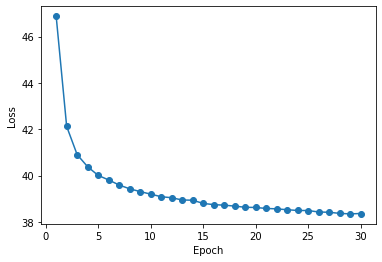

In [9]:
# plot losses
epochs = list(range(1, epochs + 1))
plt.plot(epochs, losses, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


### 7.4.4 新しい画像の生成

VAEの学習が完了すると、新しい画像を生成することができる。

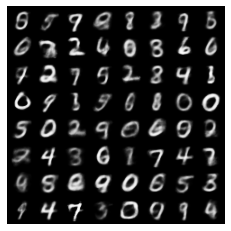

In [10]:
# generate new images
with torch.no_grad():                                                                      # 勾配計算を無効化
    sample_size = 64                                                                       # サンプルサイズを定義
    z = torch.randn(sample_size, latent_dim)                                               # サンプルサイズ分(64個）の潜在変数をlatent_dimに従って生成
    x = model.decoder(z)                                                                   # モデルのデコーダに潜在変数を入力
    generated_images = x.view(sample_size, 1, 28, 28)                                      # 形状を画像の形状に変換

grid_img = torchvision.utils.make_grid(generated_images, nrow=8, padding=2, normalize=True)# 生成された画像をグリッド状に並べる。
plt.imshow(grid_img.permute(1, 2, 0))                                                      # 画像の出力
plt.axis('off')                                                                            # 軸の非表示
plt.show()

手書きの数字の大まかな特徴を捉えていることがわかるらしい。